In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as stats
import pylab
import numpy as np

In [2]:
# 加载数据集
train = pd.read_csv('./data/train.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
age = train['Age']

In [5]:
# 极差
d_range = age.max() - age.min()
print(d_range)

79.58


In [6]:
# 四分位数
quartile = age.quantile([.25, .5, .75])
print(quartile)

0.25    20.125
0.50    28.000
0.75    38.000
Name: Age, dtype: float64


In [7]:
# 四分位数极差
quartile = quartile.values
IQR = quartile[2] - quartile[0]
print(IQR)

17.875


In [8]:
# 五数概括
q1 = quartile[0]
q3 = quartile[2]
minimum = age.min()
maxinum = age.max()
median = quartile[1]
print(minimum, q1, median, q3, maxinum)

0.42 20.125 28.0 38.0 80.0


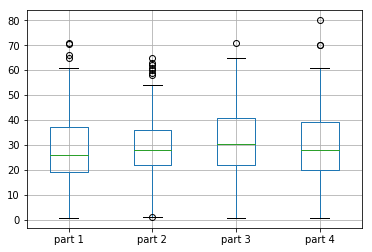

In [9]:
# 绘制盒图
# 年龄数据切分
ages = [age.values[i*200: (i+1)*200] for i in range(4)]

# 绘制盒图
age_df = pd.DataFrame({
    'part 1': ages[0],
    'part 2': ages[1],
    'part 3': ages[2],
    'part 4': ages[3],
})

age_df.boxplot()
plt.show()

In [10]:
# 计算方差
age.var()

211.01912474630802

In [11]:
# 计算标准差
age.std()

14.526497332334042

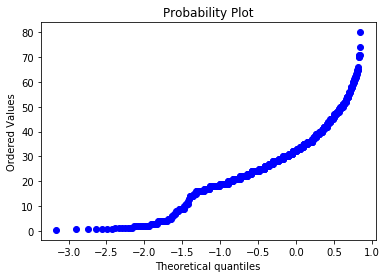

In [21]:
# 画 q-q 图
stats.probplot(age.values, dist='norm', plot=pylab)
pylab.show()

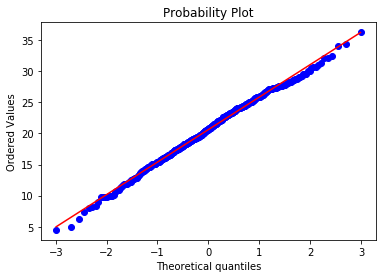

In [18]:
datas = np.random.normal(loc=20, scale=5, size=500)
stats.probplot(datas, dist='norm', plot=pylab)
pylab.show()

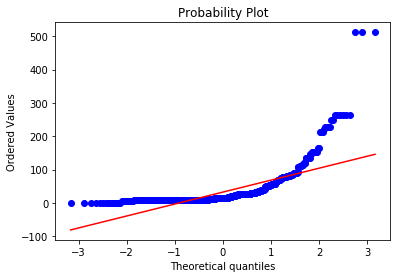

In [15]:
stats.probplot(train['Fare'], dist='norm', plot=pylab)
pylab.show()

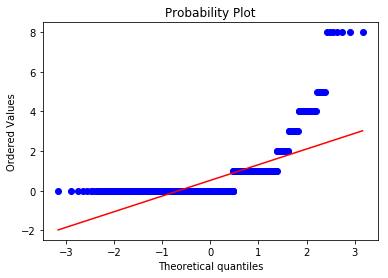

In [20]:
stats.probplot(train['SibSp'], dist='norm', plot=pylab)
pylab.show()

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

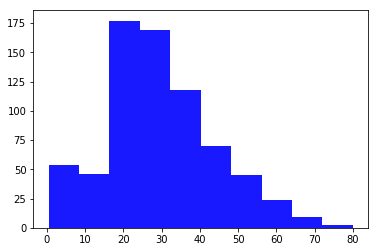

In [27]:
# 绘制直方图
fig, ax = plt.subplots()
ax.hist(age.dropna(), alpha=0.9, color='blue')

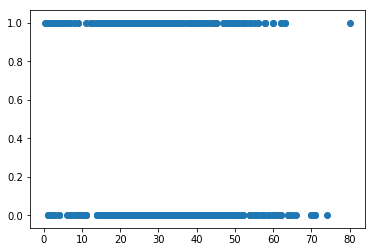

In [29]:
# 绘制散点图
fig, ax = plt.subplots()
ax.scatter(train['Age'], train['Survived'])

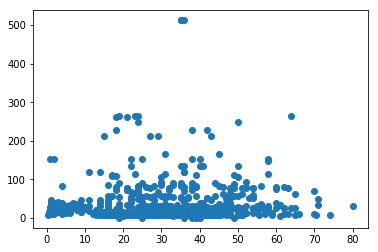

In [31]:
# 绘制散点图
fig, ax = plt.subplots()
ax.scatter(train['Age'], train['Fare'])